In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
set_session(tf.Session(config=config))

Using TensorFlow backend.


# 1. 데이터셋

In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [5]:
train_targets[:5]

array([ 15.2,  42.3,  50. ,  21.1,  17.7])

# 2. 데이터 준비

- 상이한 스케일을 가진 값에 신경망에 주입하면 문제가 발생한다.
- 네트워크가 다양한 데이터에 자동으로 맞출 수도 있지만 학습을 더 어렵게 한다.
- 이럴 때 대표적인 방법은 특성 별로 정규화를 하는 것이다.

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

- 테스트 데이터를 정규화할 때 사용한 값이 훈련 데이터에 사용한 값이다.

# 3. 모델 구성

In [7]:
from keras import models
from keras import layers

- 훈련 데이터의 개수가 작을수록 과대적합이 더 쉽게 일어나므로 작은 모델을 사용하는 것이 과대적합을 피하는 방법이다.
- 샘플의 수가 적기 때문에 64개 유닛을 가진 2개의 은닉 층으로 작은 네트워크를 구성하여 사용한다.

In [9]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# 4. K-fold cross validation

In [17]:
import numpy as np

In [12]:
# basic setting
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print("Fold #", i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Fold # 0
Epoch 1/100
303/303 [==============================] - 2s 7ms/step - loss: 202.3814 - mean_absolute_error: 10.7722
Epoch 2/100
303/303 [==============================] - 1s 3ms/step - loss: 30.2373 - mean_absolute_error: 3.8334
Epoch 3/100
303/303 [==============================] - 1s 3ms/step - loss: 21.3092 - mean_absolute_error: 3.1753
Epoch 4/100
303/303 [==============================] - 1s 3ms/step - loss: 18.2486 - mean_absolute_error: 2.8959
Epoch 5/100
303/303 [==============================] - 1s 3ms/step - loss: 16.6025 - mean_absolute_error: 2.6640
Epoch 6/100
303/303 [==============================] - 1s 3ms/step - loss: 15.4888 - mean_absolute_error: 2.5713
Epoch 7/100
303/303 [==============================] - 1s 3ms/step - loss: 14.2158 - mean_absolute_error: 2.5346
Epoch 8/100
303/303 [==============================] - 1s 3ms/step - loss: 13.8676 - mean_absolute_error: 2.4219
Epoch 9/100
303/303 [==============================] - 1s 3ms/step - loss: 13.3236 - 

303/303 [==============================] - 1s 3ms/step - loss: 5.2295 - mean_absolute_error: 1.4335
Epoch 74/100
303/303 [==============================] - 1s 3ms/step - loss: 5.0826 - mean_absolute_error: 1.4890
Epoch 75/100
303/303 [==============================] - 1s 3ms/step - loss: 5.1546 - mean_absolute_error: 1.5215
Epoch 76/100
303/303 [==============================] - 1s 3ms/step - loss: 5.3656 - mean_absolute_error: 1.4903
Epoch 77/100
303/303 [==============================] - 1s 3ms/step - loss: 5.2214 - mean_absolute_error: 1.4135
Epoch 78/100
303/303 [==============================] - 1s 3ms/step - loss: 5.5000 - mean_absolute_error: 1.5149
Epoch 79/100
303/303 [==============================] - 1s 3ms/step - loss: 4.9559 - mean_absolute_error: 1.4120
Epoch 80/100
303/303 [==============================] - 1s 3ms/step - loss: 5.1105 - mean_absolute_error: 1.4332
Epoch 81/100
303/303 [==============================] - 1s 3ms/step - loss: 5.1698 - mean_absolute_error: 1.4

303/303 [==============================] - 1s 3ms/step - loss: 6.6000 - mean_absolute_error: 1.6647
Epoch 46/100
303/303 [==============================] - 1s 3ms/step - loss: 7.0584 - mean_absolute_error: 1.6779
Epoch 47/100
303/303 [==============================] - 1s 3ms/step - loss: 7.2593 - mean_absolute_error: 1.6894
Epoch 48/100
303/303 [==============================] - 1s 3ms/step - loss: 7.3663 - mean_absolute_error: 1.6909
Epoch 49/100
303/303 [==============================] - 1s 3ms/step - loss: 6.8720 - mean_absolute_error: 1.6587
Epoch 50/100
303/303 [==============================] - 1s 3ms/step - loss: 6.8038 - mean_absolute_error: 1.6514
Epoch 51/100
303/303 [==============================] - 1s 3ms/step - loss: 6.8392 - mean_absolute_error: 1.6247
Epoch 52/100
303/303 [==============================] - 1s 3ms/step - loss: 6.5022 - mean_absolute_error: 1.6142
Epoch 53/100
303/303 [==============================] - 1s 3ms/step - loss: 6.6536 - mean_absolute_error: 1.6

303/303 [==============================] - 1s 3ms/step - loss: 7.9245 - mean_absolute_error: 1.9863
Epoch 18/100
303/303 [==============================] - 1s 3ms/step - loss: 8.0802 - mean_absolute_error: 1.9634A: 0s - loss: 5.6697 - mean_absolute_
Epoch 19/100
303/303 [==============================] - 1s 3ms/step - loss: 7.2612 - mean_absolute_error: 1.9237
Epoch 20/100
303/303 [==============================] - 1s 3ms/step - loss: 7.7217 - mean_absolute_error: 1.9515
Epoch 21/100
303/303 [==============================] - 1s 3ms/step - loss: 7.5143 - mean_absolute_error: 1.9163
Epoch 22/100
303/303 [==============================] - 1s 3ms/step - loss: 7.4265 - mean_absolute_error: 1.8846
Epoch 23/100
303/303 [==============================] - 1s 3ms/step - loss: 7.0978 - mean_absolute_error: 1.8649
Epoch 24/100
303/303 [==============================] - 1s 3ms/step - loss: 6.8884 - mean_absolute_error: 1.8275
Epoch 25/100
303/303 [==============================] - 1s 3ms/step - lo

303/303 [==============================] - 1s 3ms/step - loss: 3.3465 - mean_absolute_error: 1.2621
Epoch 90/100
303/303 [==============================] - 1s 3ms/step - loss: 3.5100 - mean_absolute_error: 1.3350
Epoch 91/100
303/303 [==============================] - 1s 3ms/step - loss: 3.4275 - mean_absolute_error: 1.3318
Epoch 92/100
303/303 [==============================] - 1s 3ms/step - loss: 3.0367 - mean_absolute_error: 1.2993
Epoch 93/100
303/303 [==============================] - 1s 3ms/step - loss: 3.1012 - mean_absolute_error: 1.2649
Epoch 94/100
303/303 [==============================] - 1s 3ms/step - loss: 3.1163 - mean_absolute_error: 1.3133
Epoch 95/100
303/303 [==============================] - 1s 3ms/step - loss: 3.1788 - mean_absolute_error: 1.2646
Epoch 96/100
303/303 [==============================] - 1s 3ms/step - loss: 2.9149 - mean_absolute_error: 1.2715
Epoch 97/100
303/303 [==============================] - 1s 3ms/step - loss: 2.8338 - mean_absolute_error: 1.2

303/303 [==============================] - 1s 3ms/step - loss: 6.1118 - mean_absolute_error: 1.5677
Epoch 62/100
303/303 [==============================] - 1s 3ms/step - loss: 5.6672 - mean_absolute_error: 1.4913
Epoch 63/100
303/303 [==============================] - 1s 3ms/step - loss: 5.8708 - mean_absolute_error: 1.5426
Epoch 64/100
303/303 [==============================] - 1s 3ms/step - loss: 5.4239 - mean_absolute_error: 1.4751
Epoch 65/100
303/303 [==============================] - 1s 3ms/step - loss: 5.5321 - mean_absolute_error: 1.4605
Epoch 66/100
303/303 [==============================] - 1s 3ms/step - loss: 5.7635 - mean_absolute_error: 1.4770
Epoch 67/100
303/303 [==============================] - 1s 3ms/step - loss: 5.0513 - mean_absolute_error: 1.4186
Epoch 68/100
303/303 [==============================] - 1s 3ms/step - loss: 5.6995 - mean_absolute_error: 1.4836
Epoch 69/100
303/303 [==============================] - 1s 3ms/step - loss: 5.5904 - mean_absolute_error: 1.4

- 훈련 데이터가 다르므로 Fold마다 차이가 크다.

In [16]:
print("Fold: ", all_scores)
print("평균: ", np.mean(all_scores))

Fold:  [2.0795100750309405, 2.1256101273074011, 2.914361531191533, 2.429211435931744]
평균:  2.38717329237


### 각 폴드에서 검증 점수를 로그에 저장하기

In [19]:
# basic setting
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []

for i in range(k):
    print("Fold #", i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, 
                        partial_train_targets, 
                        epochs=num_epochs, 
                        batch_size=1, 
                        verbose=1,
                        validation_data=(val_data, val_targets))
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

Fold # 0
Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 1s 5ms/step - loss: 206.4617 - mean_absolute_error: 10.6785 - val_loss: 36.8770 - val_mean_absolute_error: 3.9557
Epoch 2/100
303/303 [==============================] - 1s 3ms/step - loss: 29.5169 - mean_absolute_error: 3.6806 - val_loss: 23.8244 - val_mean_absolute_error: 2.8864
Epoch 3/100
303/303 [==============================] - 1s 3ms/step - loss: 21.1487 - mean_absolute_error: 3.0352 - val_loss: 18.0361 - val_mean_absolute_error: 2.8274
Epoch 4/100
303/303 [==============================] - 1s 3ms/step - loss: 17.3036 - mean_absolute_error: 2.8010 - val_loss: 16.5733 - val_mean_absolute_error: 2.4525
Epoch 5/100
303/303 [==============================] - 1s 3ms/step - loss: 16.3387 - mean_absolute_error: 2.7035 - val_loss: 14.2414 - val_mean_absolute_error: 2.5875
Epoch 6/100
303/303 [==============================] - 1s 3ms/step - loss: 15.1688 - mean_absolute_error: 2.

Epoch 50/100
303/303 [==============================] - 1s 3ms/step - loss: 6.8216 - mean_absolute_error: 1.7105 - val_loss: 8.1731 - val_mean_absolute_error: 2.1184
Epoch 51/100
303/303 [==============================] - 1s 3ms/step - loss: 7.0141 - mean_absolute_error: 1.7074 - val_loss: 8.0890 - val_mean_absolute_error: 1.8996
Epoch 52/100
303/303 [==============================] - 1s 3ms/step - loss: 7.2121 - mean_absolute_error: 1.6749 - val_loss: 8.2874 - val_mean_absolute_error: 1.9407
Epoch 53/100
303/303 [==============================] - 1s 3ms/step - loss: 6.9366 - mean_absolute_error: 1.7205 - val_loss: 8.3388 - val_mean_absolute_error: 2.1873
Epoch 54/100
303/303 [==============================] - 1s 3ms/step - loss: 6.6724 - mean_absolute_error: 1.6683 - val_loss: 8.8090 - val_mean_absolute_error: 2.0505
Epoch 55/100
303/303 [==============================] - 1s 3ms/step - loss: 6.6192 - mean_absolute_error: 1.6984 - val_loss: 8.2345 - val_mean_absolute_error: 2.0610
Epoc

303/303 [==============================] - 1s 3ms/step - loss: 4.2695 - mean_absolute_error: 1.3460 - val_loss: 8.7132 - val_mean_absolute_error: 2.1684
Epoch 100/100
303/303 [==============================] - 1s 3ms/step - loss: 4.3654 - mean_absolute_error: 1.4127 - val_loss: 8.5836 - val_mean_absolute_error: 2.2473
Fold # 1
Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 1s 4ms/step - loss: 214.5044 - mean_absolute_error: 11.2418 - val_loss: 29.4047 - val_mean_absolute_error: 4.0539
Epoch 2/100
303/303 [==============================] - 1s 3ms/step - loss: 29.7695 - mean_absolute_error: 3.6074 - val_loss: 20.4867 - val_mean_absolute_error: 3.3105
Epoch 3/100
303/303 [==============================] - 1s 3ms/step - loss: 20.1830 - mean_absolute_error: 2.9074 - val_loss: 17.9674 - val_mean_absolute_error: 3.0607
Epoch 4/100
303/303 [==============================] - 1s 3ms/step - loss: 17.5573 - mean_absolute_error: 2.6407 - val_los

Epoch 48/100
303/303 [==============================] - 1s 3ms/step - loss: 6.3560 - mean_absolute_error: 1.6905 - val_loss: 8.9298 - val_mean_absolute_error: 2.2573
Epoch 49/100
303/303 [==============================] - 1s 3ms/step - loss: 6.1261 - mean_absolute_error: 1.6046 - val_loss: 14.4678 - val_mean_absolute_error: 2.8326
Epoch 50/100
303/303 [==============================] - 1s 3ms/step - loss: 6.0642 - mean_absolute_error: 1.6356 - val_loss: 12.1619 - val_mean_absolute_error: 2.5343
Epoch 51/100
303/303 [==============================] - 1s 3ms/step - loss: 5.7963 - mean_absolute_error: 1.6806 - val_loss: 9.4634 - val_mean_absolute_error: 2.3088
Epoch 52/100
303/303 [==============================] - 1s 3ms/step - loss: 6.0990 - mean_absolute_error: 1.5987 - val_loss: 9.3498 - val_mean_absolute_error: 2.3376
Epoch 53/100
303/303 [==============================] - 1s 3ms/step - loss: 5.8928 - mean_absolute_error: 1.6222 - val_loss: 9.3182 - val_mean_absolute_error: 2.2912
Ep

303/303 [==============================] - 1s 3ms/step - loss: 4.0189 - mean_absolute_error: 1.3598 - val_loss: 9.6154 - val_mean_absolute_error: 2.3533
Epoch 98/100
303/303 [==============================] - 1s 3ms/step - loss: 3.8814 - mean_absolute_error: 1.2630 - val_loss: 14.7490 - val_mean_absolute_error: 2.8580
Epoch 99/100
303/303 [==============================] - 1s 3ms/step - loss: 4.1899 - mean_absolute_error: 1.3862 - val_loss: 9.6477 - val_mean_absolute_error: 2.3232
Epoch 100/100
303/303 [==============================] - 1s 3ms/step - loss: 3.8754 - mean_absolute_error: 1.3348 - val_loss: 10.0547 - val_mean_absolute_error: 2.4382
Fold # 2
Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 1s 4ms/step - loss: 202.6163 - mean_absolute_error: 10.5210 - val_loss: 40.5898 - val_mean_absolute_error: 4.3953
Epoch 2/100
303/303 [==============================] - 1s 3ms/step - loss: 30.8828 - mean_absolute_error: 3.6654 - val_los

Epoch 46/100
303/303 [==============================] - 1s 3ms/step - loss: 5.0317 - mean_absolute_error: 1.5469 - val_loss: 15.5053 - val_mean_absolute_error: 2.6564
Epoch 47/100
303/303 [==============================] - 1s 3ms/step - loss: 5.1044 - mean_absolute_error: 1.5760 - val_loss: 15.6127 - val_mean_absolute_error: 2.6012
Epoch 48/100
303/303 [==============================] - 1s 3ms/step - loss: 5.0970 - mean_absolute_error: 1.6102 - val_loss: 16.6470 - val_mean_absolute_error: 2.7264
Epoch 49/100
303/303 [==============================] - 1s 3ms/step - loss: 5.2147 - mean_absolute_error: 1.5805 - val_loss: 14.9609 - val_mean_absolute_error: 2.5863
Epoch 50/100
303/303 [==============================] - 1s 3ms/step - loss: 5.0893 - mean_absolute_error: 1.5433 - val_loss: 16.2506 - val_mean_absolute_error: 2.7742
Epoch 51/100
303/303 [==============================] - 1s 3ms/step - loss: 4.9038 - mean_absolute_error: 1.5880 - val_loss: 15.9955 - val_mean_absolute_error: 2.677

Epoch 95/100
303/303 [==============================] - 1s 3ms/step - loss: 3.0953 - mean_absolute_error: 1.2313 - val_loss: 18.2806 - val_mean_absolute_error: 2.8819
Epoch 96/100
303/303 [==============================] - 1s 3ms/step - loss: 3.2160 - mean_absolute_error: 1.2718 - val_loss: 17.3411 - val_mean_absolute_error: 2.8399
Epoch 97/100
303/303 [==============================] - 1s 3ms/step - loss: 3.2115 - mean_absolute_error: 1.2707 - val_loss: 18.3750 - val_mean_absolute_error: 2.9240
Epoch 98/100
303/303 [==============================] - 1s 3ms/step - loss: 3.2216 - mean_absolute_error: 1.2852 - val_loss: 15.4034 - val_mean_absolute_error: 2.6141
Epoch 99/100
303/303 [==============================] - 1s 3ms/step - loss: 3.1522 - mean_absolute_error: 1.2415 - val_loss: 16.7950 - val_mean_absolute_error: 2.7211
Epoch 100/100
303/303 [==============================] - 1s 3ms/step - loss: 3.1154 - mean_absolute_error: 1.2572 - val_loss: 16.6855 - val_mean_absolute_error: 2.69

303/303 [==============================] - 1s 3ms/step - loss: 6.3774 - mean_absolute_error: 1.6569 - val_loss: 12.8029 - val_mean_absolute_error: 2.5867
Epoch 44/100
303/303 [==============================] - 1s 3ms/step - loss: 6.0084 - mean_absolute_error: 1.6126 - val_loss: 12.6772 - val_mean_absolute_error: 2.4884
Epoch 45/100
303/303 [==============================] - 1s 3ms/step - loss: 6.0177 - mean_absolute_error: 1.5679 - val_loss: 12.3698 - val_mean_absolute_error: 2.5166
Epoch 46/100
303/303 [==============================] - 1s 3ms/step - loss: 5.8671 - mean_absolute_error: 1.5706 - val_loss: 13.4331 - val_mean_absolute_error: 2.5824
Epoch 47/100
303/303 [==============================] - 1s 3ms/step - loss: 6.0348 - mean_absolute_error: 1.6234 - val_loss: 12.6774 - val_mean_absolute_error: 2.5114
Epoch 48/100
303/303 [==============================] - 1s 3ms/step - loss: 5.9314 - mean_absolute_error: 1.5978 - val_loss: 12.1973 - val_mean_absolute_error: 2.5313
Epoch 49/10

303/303 [==============================] - 1s 3ms/step - loss: 4.0381 - mean_absolute_error: 1.2940 - val_loss: 11.6632 - val_mean_absolute_error: 2.4909
Epoch 93/100
303/303 [==============================] - 1s 3ms/step - loss: 4.1566 - mean_absolute_error: 1.3526 - val_loss: 10.7186 - val_mean_absolute_error: 2.3382
Epoch 94/100
303/303 [==============================] - 1s 3ms/step - loss: 3.8318 - mean_absolute_error: 1.3007 - val_loss: 10.3778 - val_mean_absolute_error: 2.2341
Epoch 95/100
303/303 [==============================] - 1s 3ms/step - loss: 4.1383 - mean_absolute_error: 1.3075 - val_loss: 12.1162 - val_mean_absolute_error: 2.4807
Epoch 96/100
303/303 [==============================] - 1s 3ms/step - loss: 3.8506 - mean_absolute_error: 1.3147 - val_loss: 12.9763 - val_mean_absolute_error: 2.5555
Epoch 97/100
303/303 [==============================] - 1s 3ms/step - loss: 3.9895 - mean_absolute_error: 1.3048 - val_loss: 10.9401 - val_mean_absolute_error: 2.3329
Epoch 98/10

In [21]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

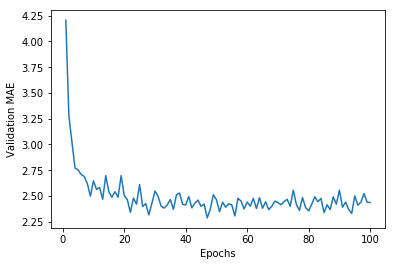

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

- 지수 이동 평균으로 전체적인 트렌드 확인하기

In [23]:
def smooth_curve(points, factor=0.9):
    smooth_points = []
    
    for point in points:
        if smooth_points:
            previous = smooth_points[-1]
            smooth_points.append(previous * factor + point * (1 - factor))
        else:
            smooth_points.append(point)
    return smooth_points

In [24]:
smooth_mae_history = smooth_curve(average_mae_history)

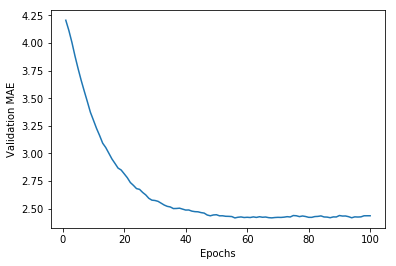

In [25]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

약 epoch 60에서 Fitting 되었다.

# 5. 최종 모델

In [26]:
model = build_model()
model.fit(train_data, train_targets, 
          epochs=60, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/60
404/404 [==============================] - 1s 1ms/step - loss: 496.8691 - mean_absolute_error: 20.1655
Epoch 2/60
404/404 [==============================] - 0s 166us/step - loss: 323.6476 - mean_absolute_error: 15.5035
Epoch 3/60
404/404 [==============================] - 0s 156us/step - loss: 146.4803 - mean_absolute_error: 9.7482
Epoch 4/60
404/404 [==============================] - 0s 166us/step - loss: 49.6930 - mean_absolute_error: 5.0919
Epoch 5/60
404/404 [==============================] - 0s 164us/step - loss: 28.1975 - mean_absolute_error: 3.7582
Epoch 6/60
404/404 [==============================] - 0s 163us/step - loss: 21.9454 - mean_absolute_error: 3.2758
Epoch 7/60
404/404 [==============================] - 0s 166us/step - loss: 18.8211 - mean_absolute_error: 3.0150
Epoch 8/60
404/404 [==============================] - 0s 168us/step - loss: 17.2035 - mean_absolute_error: 2.8354
Epoch 9/60
404/404 [==============================] - 0s 173us/step - loss: 15.5698 -

In [27]:
test_mae_score

2.6704824952518238

# 6. 정리

1. 회귀는 분류에서 사용했던 것과는 다른 손실 함수를 사용한다. 평균 제곱 오차는 회귀에서 자주 사용되는 손실 함수이다.
2. 비슷하게 회귀에서 사용되는 평가 지표는 분류와 다르다. 일반적인 회귀 지표는 평균 제곱 오차(MAE)이다.
3. 입력 데이터 특성이 서로 다른 범위를 가지면 전처리 단계에서 각 특성을 개별적으로 스케일 조정해야 한다.
4. 가용한 데이터가 적다면 K Fold cross validation을 사용하는 것이 신뢰할 수 있는 모델 평가 방법이다.
5. 가용한 훈련 데이터가 적다면 과대적합을 피하기 위해 은닉 층의 수를 줄인 모델이 좋습니다.(일반적으로 1, 2개)